# Synthetic Histograms

In [42]:
import sys
sys.path.insert(0, '../../../src_tf/')

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from loss_functions import ProbabilityMSE, ProbabilityRValue
from optimization import ModelQuantumMap, Logger
from quantum_channel import ReplacementChannel, channel_fidelity
from kraus_channels import DilutedKrausMap, KrausMap
from quantum_tools import generate_unitary, circuit_to_matrix
from spectrum import channel_spectrum
from quantum_circuits import pqc_basic
from utils import loader
from experimental import generate_pauli_circuits

np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

## Homogeneous Probabilities

In [53]:
n = 3
d = 2**n

np.random.seed(42)
tf.random.set_seed(42)

inputs, _ = generate_pauli_circuits(n = n, 
                                    circuit_target=None)

print(inputs[0].shape)

targets = tf.cast(np.ones((inputs[0].shape[0], d)), dtype = tf.complex128)/d

(5832, 8, 8)


In [54]:
np.random.seed(42)
tf.random.set_seed(42)

channel_model = KrausMap(d=d,
                         rank=d**2,)

In [55]:
model = ModelQuantumMap(channel = channel_model,
                        loss_function = ProbabilityMSE(),
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(loss_function = ProbabilityMSE(),
                                        loss_function_val = ProbabilityRValue(),)
                        )

In [56]:
model.train(inputs = inputs, 
            targets = targets,
            inputs_val = inputs,
            targets_val = targets, 
            num_iter = 1000, 
            N = 500, 
            verbose = True)

  0%|          | 0/1000 [00:00<?, ?it/s]

0.01328828612988088 -inf
0.0015453017146072384 -inf
0.0007338136760280432 -inf
0.0003950045355231442 -inf
0.00022995439219415266 -inf
0.00014753684108499723 -inf
6.565152583225304e-05 -inf
2.7293592581716425e-05 -inf
8.242775146301582e-06 -inf
2.5397393705643813e-06 -inf
5.72014158663164e-07 -inf


In [57]:
channel_target = ReplacementChannel(d=d)
print(channel_fidelity(model.channel, channel_target))

tf.Tensor(0.9999027330759275, shape=(), dtype=float64)


## Uniform Probabilities

In [62]:
n = 3
d = 2**n

np.random.seed(42)
tf.random.set_seed(42)

inputs, _ = generate_pauli_circuits(n = n, 
                                    circuit_target=None)

print(inputs[0].shape)
N = inputs[0].shape[0]
targets = np.random.normal(0, 1, (N,d))
targets = np.abs(targets)
targets = targets/np.sum(targets, axis=1).reshape(-1, 1)
targets = tf.cast(targets, dtype = tf.complex128)

(5832, 8, 8)


In [67]:
print(np.sum(targets, axis=1))

[1.+0.j 1.+0.j 1.+0.j ... 1.+0.j 1.+0.j 1.+0.j]


In [63]:
model = ModelQuantumMap(channel = channel_model,
                        loss_function = ProbabilityMSE(),
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(loss_function = ProbabilityMSE(),
                                        loss_function_val = ProbabilityRValue(),)
                        )

In [69]:
model.train(inputs = inputs, 
            targets = targets,
            inputs_val = inputs,
            targets_val = targets, 
            num_iter = 1000, 
            N = 500, 
            verbose = True)

  0%|          | 0/1000 [00:00<?, ?it/s]

0.4853081719481133 0.06049476682999433
0.5003845779187245 0.06037996195884354
0.47317468012673586 0.060458651107143546
0.4601588304763634 0.060559065411644464
0.4753641500535147 0.060594741200196145
0.49722627335668734 0.06044676682119143
0.4891242774688424 0.06060814491050004
0.4675966515822301 0.06059562723665468
0.4650252244826957 0.06062655867232469
0.4796070094753565 0.06048078727629691
0.4858975380410292 0.060664028021365723


c:\Program Files\Anaconda3\envs\env_qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


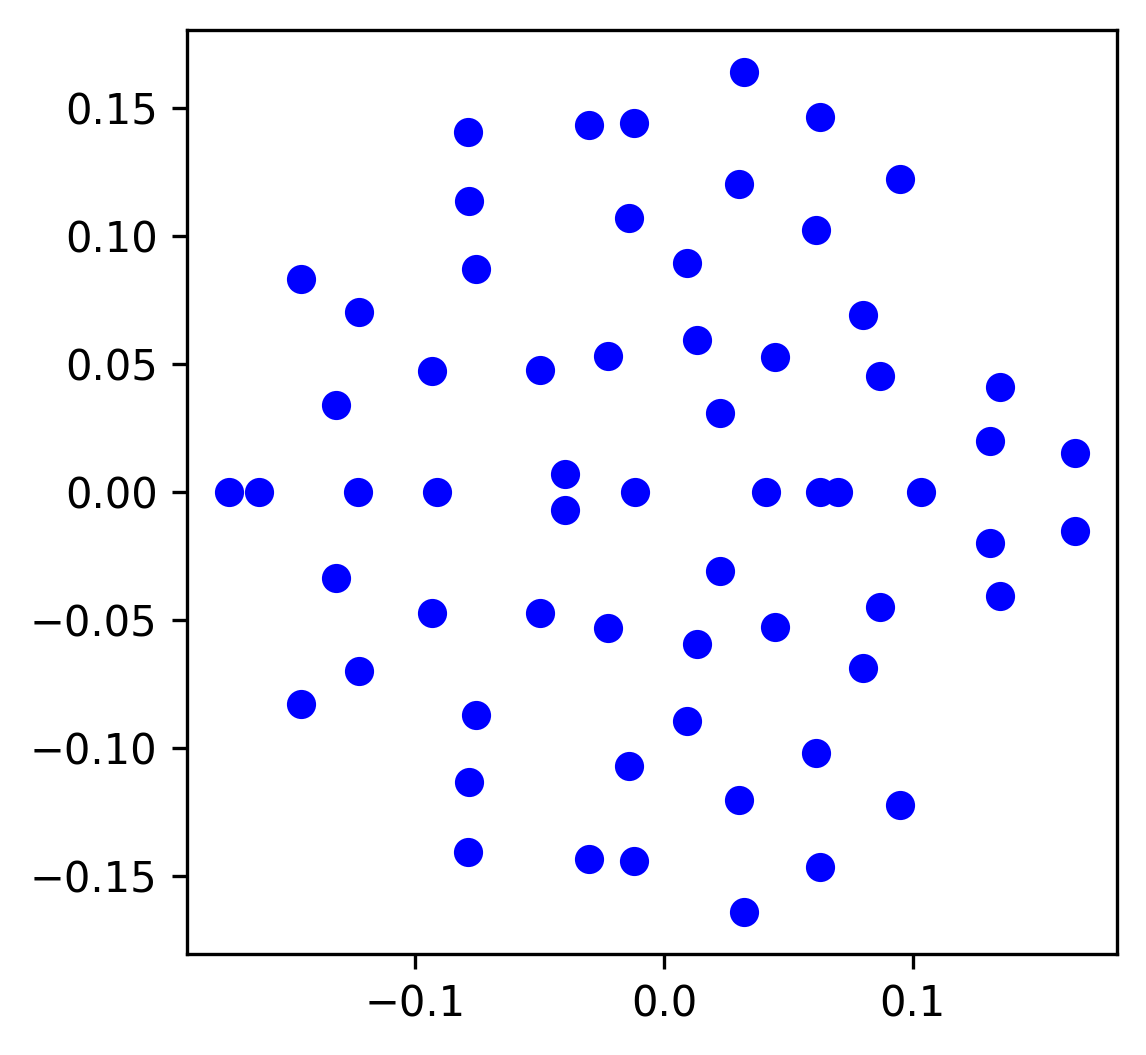

In [71]:
spectrum_model = channel_spectrum(model.channel, keep_unity=False)

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.plot(spectrum_model[:,0], spectrum_model[:,1], "bo")
plt.show()

c:\Program Files\Anaconda3\envs\env_qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


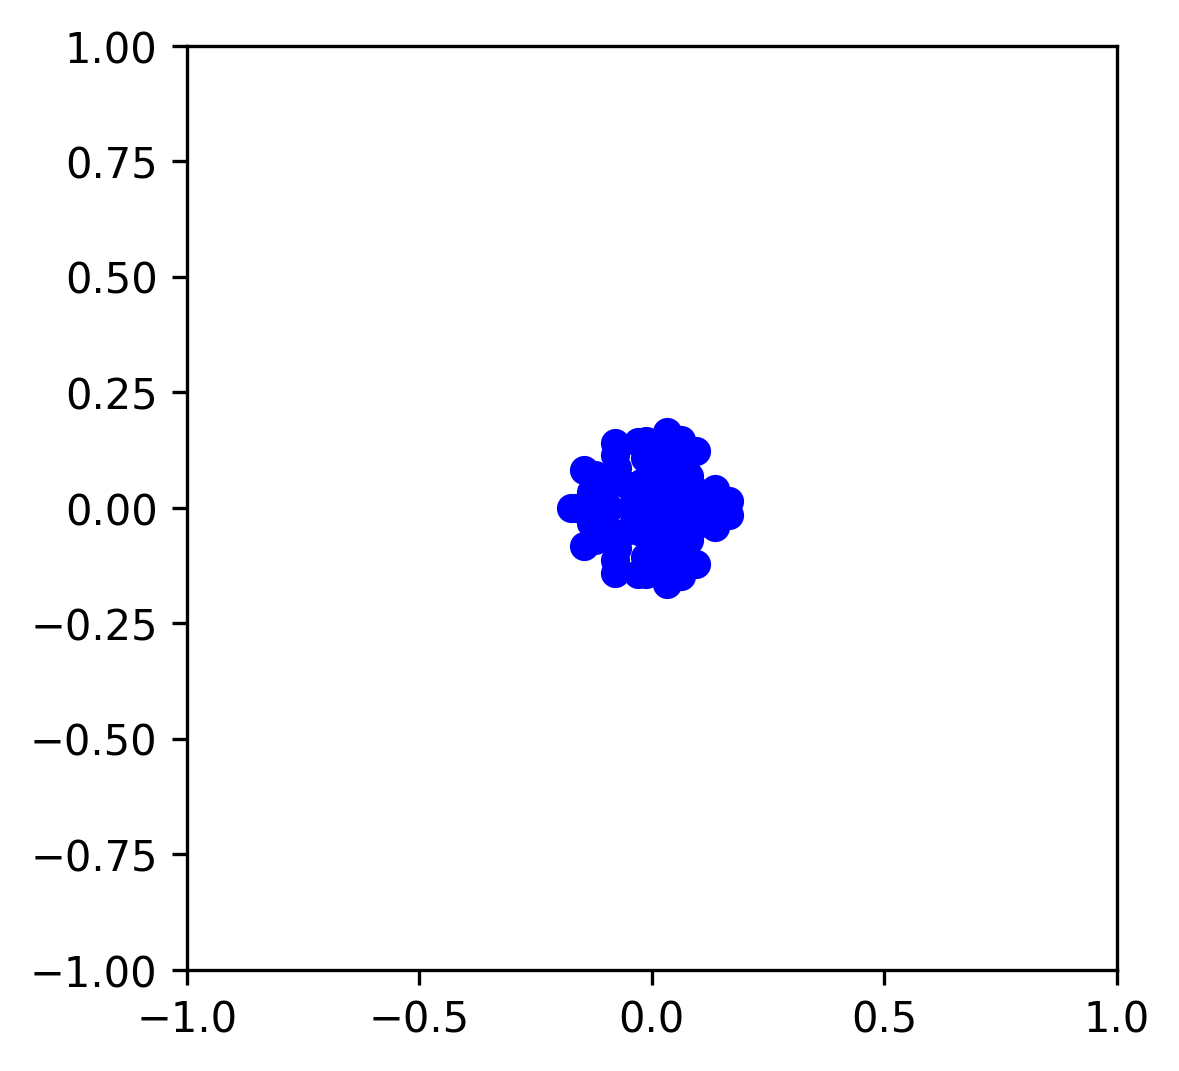

In [72]:
spectrum_model = channel_spectrum(model.channel, keep_unity=False)

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.plot(spectrum_model[:,0], spectrum_model[:,1], "bo")
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.show()